In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
uploaded = files.upload()
traindata = pd.read_csv(io.BytesIO(uploaded['test-Minimum-Error-Rate-Classifier.txt']), header = None, sep = ",")

Saving test-Minimum-Error-Rate-Classifier.txt to test-Minimum-Error-Rate-Classifier (3).txt


In [3]:
train=traindata.to_numpy();
print(train)

[[ 1.   1. ]
 [ 1.  -1. ]
 [ 4.   5. ]
 [-2.   2.5]
 [ 0.   2. ]
 [ 2.  -3. ]]


In [4]:
D = len(train[0])
print(D)
miu1 = np.array([0, 0])
miu2 = np.array([2, 2])
sigma1 = np.array([[0.25, 0.3], [0.3, 1.0]])
sigma2 = np.array([[0.5, 0], [0, 0.5]])
constant1 = np.power((np.power(2 * np.pi, D) * np.linalg.det(sigma1)), 0.5) #for normalize P(X1)
constant2 = np.power((np.power(2 * np.pi, D) * np.linalg.det(sigma2)), 0.5) #for normalize P(X2)
prior1 = prior2 = 0.5 

2


In [5]:
#TASK 01: CLASSIFY THE DATA
class1 = []
class2 = []

for i in range(len(train)):
  x = [train[i][0], train[i][1]]
  g1_x = prior1 * ((np.exp(-0.5 * np.matmul((x - miu1), np.matmul(np.linalg.inv(sigma1), x - miu1))))/constant1)
  g2_x = prior2 * ((np.exp(-0.5 * np.matmul((x - miu2), np.matmul(np.linalg.inv(sigma2), x - miu2))))/constant2)
  if g1_x > g2_x:
    class1.append(x)
  else:
    class2.append(x) 

In [6]:
class1 = np.array(class1)
print(class1)

class2 = np.array(class2)
print(class2)

[[ 1.  1.]
 [ 1. -1.]
 [ 0.  2.]]
[[ 4.   5. ]
 [-2.   2.5]
 [ 2.  -3. ]]


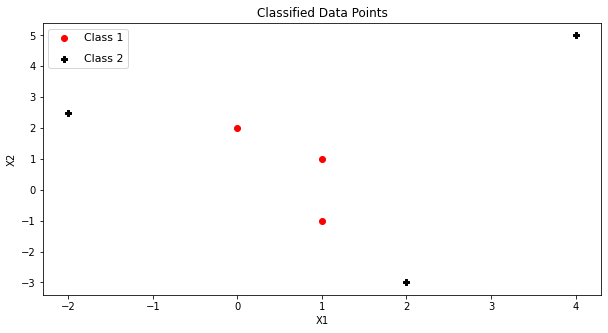

In [7]:
#TASK 02: PLOTTING THE DATA

f,ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)

ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='P',color='k',label='Class 2')
legend = ax.legend(loc='best', shadow=False, fontsize='11',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Classified Data Points")
plt.show()

**QUADRATIC DISCRIMINANT for MULTIVARITIVE GAUSSIAN DENSITY ($\Sigma_i = arbiraty)$** \\
$g_i(x) = x^t W_i x+ w_i^tx + w_{i0}$

Where, for Class, $i=2$ \\
$W_i = \Sigma_1^{-1} - \Sigma_2^{-1}$ \\
$w_i = 2*(\Sigma_1^{-1}\mu_1 - \Sigma_2^{-1}\mu_2)$ \\
$w_{i0} = - ln(\frac{\Sigma_1}{\Sigma_2}) + 2 * ln(\frac{P(x_1)}{P(x_2)}) + \mu_1^t\Sigma_1^{-1}\mu_1+ \mu_2^t\Sigma_2^{-1}\mu_2 $

In [8]:
W = np.linalg.inv(sigma1) - np.linalg.inv(sigma2)
w = 2 * (np.dot(miu1, np.linalg.inv(sigma1)) - np.dot(miu2, np.linalg.inv(sigma2)))
w0 = - np.log(np.linalg.det(sigma2)/np.linalg.det(sigma1)) + 2*np.log(prior1/prior2) + np.dot(np.dot(miu1, np.linalg.inv(sigma1)), miu1) - np.dot(np.dot(miu2, np.linalg.inv(sigma2)), miu2)

Solve for Quadratic Eqn: 
$ Y = -b + \frac{\sqrt{b^2 - 4ac}}{2a}$

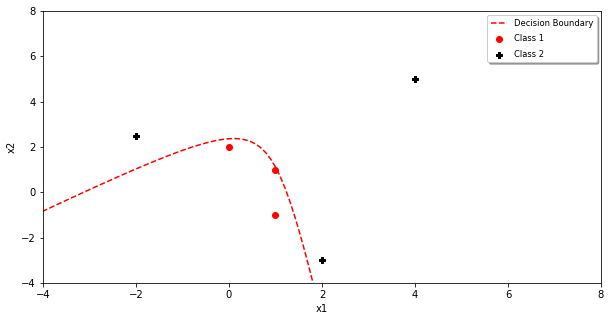

In [13]:
#TASK 04: DECISION BOUNDARY
Xi = []
Yi = []
i = 0.0
min = np.amin(train).astype(int) * 100
max = np.amax(train).astype(int) * 100

for j in range(min, max):
  i = j * 0.1
  c = W[0][0]*i*i - w[0]*i + w0
  b = W[0][1]*i + W[1][0]*i - w[1]
  a = W[1][1]
  
  y = (-b+np.sqrt(b*b - 4*a*c))/(2*a)
  Xi.append(i)
  Yi.append(y)

f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
ax.plot(Xi,Yi,"--",label='Decision Boundary',color="r")
ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='P',color='k',label='Class 2')
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.xlabel("x1")
plt.ylabel("x2")
legend = ax.legend(loc='best', shadow=True, fontsize='small',labelspacing=.8)
plt.show()

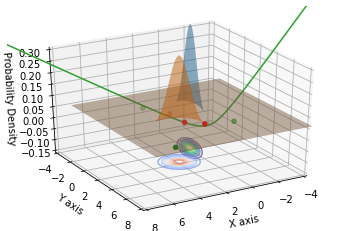

In [16]:
#TASK 03: PLOT CONTOUR AND PROBABILITY WITH DB IN 3D
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

N = 500
X = np.linspace(6, -6, N)
Y = np.linspace(6, -6, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

myFig = plt.figure(figsize=[6,4])
ax = myFig.gca(projection='3d')

Z1 = multivariate_gaussian(pos, miu1, sigma1)
Z2 = multivariate_gaussian(pos, miu2, sigma2)

#bellcurve
ax.plot_surface(X, Y, Z1, rstride=3, cstride=3, linewidth=0, antialiased=True, alpha = 0.3)
ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=0, antialiased=True, alpha = 0.3)
#contour
ax.contour(X, Y, Z1, zdir='z', offset = -0.15, cmap = cm.viridis, alpha = 0.60)
ax.contour(X, Y, Z2, zdir='z', offset = -0.15, cmap = cm.coolwarm, alpha = 0.60)


#plotdata
z = [0] * len(class1)
ax.scatter(class1[:,0], class1[:,1], z, c='red', marker='o')
z = [0] * len(class2)
ax.scatter(class2[:,0], class2[:,1], z, c='green', marker='o')

#dboundary
ax.plot(Xi,Yi)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
ax.set_zlim(-0.15,0.3)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Probability Density')
ax.view_init(30, 60)